<a href="https://colab.research.google.com/github/wojiushilr/pytorch_training/blob/master/02_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## A simple demo for LR

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn

### 随缘初始化

In [3]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)

In [4]:
# Linear Regression Model
class linearRegression(nn.Module):
    def __init__(self):
        super(linearRegression, self).__init__()
        self.linear = nn.Linear(1, 1)  # input and output is 1 dimension

    def forward(self, x):
        out = self.linear(x)
        return out

In [16]:
model = linearRegression()
# 定义loss和优化函数
# momentum=0 by default
loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)

### start training

In [20]:
# 开始训练
num_epochs = 1000
for epoch in range(num_epochs):
    inputs = x_train
    target = y_train

    # forward
    out = model(inputs)
    temp_loss = loss(out, target)

    # backward
    optimizer.zero_grad() # Clears the gradients of all optimized torch.Tensor s.
    temp_loss.backward()
    optimizer.step() # Performs a single optimization step (parameter update).

    if (epoch+1) % 200 == 0:
        print(f'Epoch[{epoch+1}/{num_epochs}], temp_loss: {temp_loss.item():.6f}')


Epoch[200/1000], temp_loss: 0.219608
Epoch[400/1000], temp_loss: 0.219089
Epoch[600/1000], temp_loss: 0.218577
Epoch[800/1000], temp_loss: 0.218069
Epoch[1000/1000], temp_loss: 0.217567


### start evaluation

In [18]:
model.eval()
with torch.no_grad():
    predict = model(x_train)
predict = predict.data.numpy()

### 可视化 & 模型保存

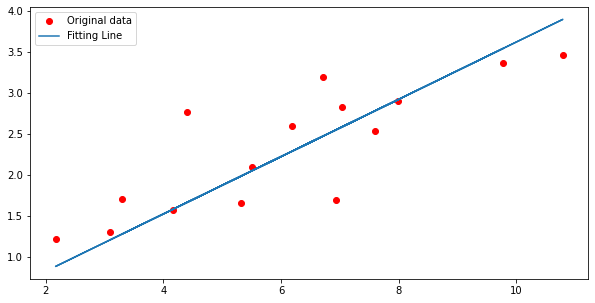

In [19]:
fig = plt.figure(figsize=(10, 5))
plt.plot(x_train.numpy(), y_train.numpy(), 'ro', label='Original data')
plt.plot(x_train.numpy(), predict, label='Fitting Line')
# 显示图例
plt.legend() 
plt.show()

# 保存模型
torch.save(model.state_dict(), './linear.pth')